In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
import pandas as pd

merged = pd.read_csv('/kaggle/input/merged/merged_output.csv', low_memory=False)

num_cols = merged.shape[1]
chunk_size = 10

dfs = [merged.iloc[:, i:i+chunk_size] for i in range(0, num_cols, chunk_size)]

      medications_START      medications_STOP  \
0                   NaN                   NaN   
1                   NaN                   NaN   
2  1984-04-11T20:25:03Z  2021-04-02T20:25:03Z   
3                   NaN                   NaN   
4                   NaN                   NaN   

                    medications_PATIENT                     medications_PAYER  \
0                                   NaN                                   NaN   
1                                   NaN                                   NaN   
2  6c13136d-c52d-20a0-dd54-83b702e7f7fa  5059a55e-5d6e-34d1-b6cb-d83d16e57bcf   
3                                   NaN                                   NaN   
4                                   NaN                                   NaN   

                              ENCOUNTER  medications_CODE  \
0  000051d9-a8ca-f039-aaf7-60a76de5b279               NaN   
1  00008c10-322b-d915-e069-3d4abd8dc561               NaN   
2  0000e73b-75ad-ff38-ebfe-9cf5af5b

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

In [7]:
dfs[0].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,medications_START,medications_STOP,medications_PATIENT,medications_PAYER,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_BASE_COST,medications_PAYER_COVERAGE,medications_DISPENSES
0,NaN,NaN,NaN,NaN,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN
2,1984-04-11T20:25:03Z,2021-04-02T20:25:03Z,6c13136d-c52d-20a0-dd54-83b702e7f7fa,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,0.03,0.0,10.0
3,NaN,NaN,NaN,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN


In [13]:
dfs[0]["medications_PATIENT"].isnull().sum()

803253

In [29]:
cols_to_remove = ["medications_START", "medications_STOP", "medications_BASE_COST",	"medications_PAYER_COVERAGE", "medications_PAYER", "medications_DISPENSES"]
dfs[0] = dfs[0].drop(columns=cols_to_remove, errors='ignore')

In [30]:
dfs[0]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,medications_PATIENT,ENCOUNTER,medications_CODE,medications_DESCRIPTION
0,NaN,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN
1,NaN,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN
2,6c13136d-c52d-20a0-dd54-83b702e7f7fa,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet
3,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN
4,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN
...,...,...,...,...
5197711,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN


In [31]:
cols_to_remove = ["medications_TOTALCOST", "immunizations_DATE", "immunizations_BASE_COST"]
dfs[1] = dfs[1].drop(columns=cols_to_remove, errors='ignore')

In [8]:
dfs[1].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,medications_TOTALCOST,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_DATE,immunizations_PATIENT,immunizations_CODE,immunizations_DESCRIPTION,immunizations_BASE_COST,encounters_START,encounters_STOP
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z
2,0.3,55822004.0,Hyperlipidemia,NaN,NaN,NaN,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z


In [14]:
dfs[1]["immunizations_PATIENT"].isnull().sum()

3845781

In [26]:
dfs[2]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,encounters_PATIENT,encounters_ORGANIZATION,encounters_PROVIDER,encounters_PAYER,encounters_ENCOUNTERCLASS,encounters_CODE,encounters_DESCRIPTION,encounters_BASE_ENCOUNTER_COST,encounters_TOTAL_CLAIM_COST,encounters_PAYER_COVERAGE
0,50ed200c-bd80-c23a-0524-ca2cb8686f47,108ccece-277a-396f-8bf2-1527f74458eb,21272be2-579c-39f8-a27c-8a56e63a4909,7caa7254-5050-3b5e-9eae-bd5ea30e809c,urgentcare,702927004.0,Urgent care clinic (procedure),129.16,129.16,89.16
1,0f921224-5091-1f71-6074-f154c0b99cd0,8ad64ecf-c817-3753-bee7-006a8e662e06,79d3009a-3314-3d95-9efb-237da8183b75,7caa7254-5050-3b5e-9eae-bd5ea30e809c,inpatient,410410006.0,Screening surveillance (regime/therapy),129.16,129.16,89.16
2,6c13136d-c52d-20a0-dd54-83b702e7f7fa,331f4c11-d298-308b-aaa1-d7825b29b57f,6f6014e9-8870-380b-8667-fe6d66159ce0,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,ambulatory,390906007.0,Follow-up encounter,77.49,77.49,7.49
3,799e7f01-e603-8a80-004b-c74e02df4f10,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,5fd4952f-7eca-31d8-a6a0-0aee2253a098,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,424619006.0,Prenatal visit,129.16,129.16,69.16
4,799e7f01-e603-8a80-004b-c74e02df4f10,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,5fd4952f-7eca-31d8-a6a0-0aee2253a098,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,424619006.0,Prenatal visit,129.16,129.16,69.16
...,...,...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dfs[2]["encounters_PATIENT"].isnull().sum()

69531

In [34]:
cols_to_remove = ["encounters_ORGANIZATION","encounters_PROVIDER","encounters_PAYER","encounters_BASE_ENCOUNTER_COST",	"encounters_TOTAL_CLAIM_COST",	"encounters_PAYER_COVERAGE"]
dfs[2] = dfs[2].drop(columns=cols_to_remove, errors='ignore')

In [35]:
dfs[2]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,encounters_PATIENT,encounters_ENCOUNTERCLASS,encounters_CODE,encounters_DESCRIPTION
0,50ed200c-bd80-c23a-0524-ca2cb8686f47,urgentcare,702927004.0,Urgent care clinic (procedure)
1,0f921224-5091-1f71-6074-f154c0b99cd0,inpatient,410410006.0,Screening surveillance (regime/therapy)
2,6c13136d-c52d-20a0-dd54-83b702e7f7fa,ambulatory,390906007.0,Follow-up encounter
3,799e7f01-e603-8a80-004b-c74e02df4f10,ambulatory,424619006.0,Prenatal visit
4,799e7f01-e603-8a80-004b-c74e02df4f10,ambulatory,424619006.0,Prenatal visit
...,...,...,...,...
5197711,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN


In [10]:
dfs[3].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,encounters_REASONCODE,encounters_REASONDESCRIPTION,careplans_ID,careplans_START,careplans_STOP,careplans_PATIENT,careplans_CODE,careplans_DESCRIPTION,careplans_REASONCODE,careplans_REASONDESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55822004.0,Hyperlipidemia,fcf0c9ea-841d-3ada-39b5-fed6f0913c32,1984-04-11,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa,736285004.0,Hyperlipidemia clinical management plan,55822004.0,Hyperlipidemia
3,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
cols_to_remove = ["careplans_ID	","careplans_START","careplans_STOP"]
dfs[3] = dfs[3].drop(columns=cols_to_remove, errors='ignore')

In [39]:
dfs[3]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,encounters_REASONCODE,encounters_REASONDESCRIPTION,careplans_ID,careplans_PATIENT,careplans_CODE,careplans_DESCRIPTION,careplans_REASONCODE,careplans_REASONDESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,NaN,NaN
2,55822004.0,Hyperlipidemia,fcf0c9ea-841d-3ada-39b5-fed6f0913c32,6c13136d-c52d-20a0-dd54-83b702e7f7fa,736285004.0,Hyperlipidemia clinical management plan,55822004.0,Hyperlipidemia
3,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN
4,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dfs[3]["careplans_PATIENT"].isnull().sum()

4765362

In [17]:
dfs[4].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,conditions_START,conditions_STOP,conditions_PATIENT,conditions_CODE,conditions_DESCRIPTION,allergies_START,allergies_STOP,allergies_PATIENT,allergies_CODE,allergies_DESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
cols_to_remove = ["careplans_ID	","conditions_START","conditions_STOP", "allergies_START","allergies_STOP"]
dfs[4] = dfs[4].drop(columns=cols_to_remove, errors='ignore')

In [41]:
dfs[4]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,conditions_PATIENT,conditions_CODE,conditions_DESCRIPTION,allergies_PATIENT,allergies_CODE,allergies_DESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dfs[5].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,devices_START,devices_STOP,devices_PATIENT,devices_CODE,devices_DESCRIPTION,devices_UDI,procedures_DATE,procedures_PATIENT,procedures_CODE,procedures_DESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,0f921224-5091-1f71-6074-f154c0b99cd0,71651007.0,Mammography (procedure)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,799e7f01-e603-8a80-004b-c74e02df4f10,274804006.0,Evaluation of uterine fundal height
4,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,799e7f01-e603-8a80-004b-c74e02df4f10,225158009.0,Auscultation of the fetal heart


In [43]:
cols_to_remove = ["device_START","devices_STOP", "devices_UDI","procedures_DATE"]
dfs[5] = dfs[5].drop(columns=cols_to_remove, errors='ignore')

In [45]:
dfs[5]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,devices_START,devices_PATIENT,devices_CODE,devices_DESCRIPTION,procedures_PATIENT,procedures_CODE,procedures_DESCRIPTION
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0,71651007.0,Mammography (procedure)
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10,274804006.0,Evaluation of uterine fundal height
4,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10,225158009.0,Auscultation of the fetal heart
...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dfs[5]["procedures_PATIENT"].isnull().sum()

1588553

In [20]:
dfs[6].head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,procedures_BASE_COST,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_DATE,observations_PATIENT,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,observations_TYPE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143.40,254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10060.95,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6456.89,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cols_to_remove = ["procedures_BASE_COST	","observations_DATE","observations_TYPE"]
dfs[6] = dfs[6].drop(columns=cols_to_remove, errors='ignore')

In [50]:
dfs[6]

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,procedures_BASE_COST,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_PATIENT,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,143.40,254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10060.95,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN
4,6456.89,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score}
5197712,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score}
5197713,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score}
5197714,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score}


In [22]:
dfs[6]["observations_PATIENT"].isnull().sum()

330382

In [24]:
patient_ids = pd.Series(np.nan, index=merged.index)

for df in dfs[:7]:
    pat_cols = [col for col in df.columns if col.endswith("PATIENT")]
    if pat_cols:
        
        patient_ids = patient_ids.fillna(df[pat_cols[0]])

new_df = pd.DataFrame({"PATIENT_ID": patient_ids})

In [27]:
new_df

,PATIENT_ID
0,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,0f921224-5091-1f71-6074-f154c0b99cd0
2,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,799e7f01-e603-8a80-004b-c74e02df4f10
4,799e7f01-e603-8a80-004b-c74e02df4f10
...,...
5197711,3107760e-1dce-a177-4122-725241aae61a
5197712,3107760e-1dce-a177-4122-725241aae61a
5197713,3107760e-1dce-a177-4122-725241aae61a
5197714,3107760e-1dce-a177-4122-725241aae61a


In [51]:
final_df = pd.concat(dfs[:7] + [new_df], axis=1)

In [52]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,medications_PATIENT,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_PATIENT,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,...,procedures_DESCRIPTION,procedures_BASE_COST,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_PATIENT,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,NaN,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,NaN,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,...,Mammography (procedure),143.40,254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,6c13136d-c52d-20a0-dd54-83b702e7f7fa,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,NaN,1984-04-11T20:25:03Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,...,Evaluation of uterine fundal height,10060.95,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,NaN,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,...,Auscultation of the fetal heart,6456.89,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3107760e-1dce-a177-4122-725241aae61a,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a


In [54]:
cols_to_remove = ["medications_PATIENT","immunizations_PATIENT","procedures_BASE_COST", "observations_PATIENT"]
final_df = final_df.drop(columns=cols_to_remove, errors='ignore')

In [55]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_PATIENT,...,procedures_PATIENT,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,50ed200c-bd80-c23a-0524-ca2cb8686f47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,0f921224-5091-1f71-6074-f154c0b99cd0,...,0f921224-5091-1f71-6074-f154c0b99cd0,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,6c13136d-c52d-20a0-dd54-83b702e7f7fa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,799e7f01-e603-8a80-004b-c74e02df4f10,...,799e7f01-e603-8a80-004b-c74e02df4f10,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,799e7f01-e603-8a80-004b-c74e02df4f10,...,799e7f01-e603-8a80-004b-c74e02df4f10,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a


In [56]:
cols_to_remove = ["encounters_PATIENT","procedures_PATIENT"]
final_df = final_df.drop(columns=cols_to_remove, errors='ignore')

In [57]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_ENCOUNTERCLASS,...,devices_DESCRIPTION,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,urgentcare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,inpatient,...,NaN,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,ambulatory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a


In [58]:
print(final_df.columns.tolist())


['ENCOUNTER', 'medications_CODE', 'medications_DESCRIPTION', 'medications_REASONCODE', 'medications_REASONDESCRIPTION', 'immunizations_CODE', 'immunizations_DESCRIPTION', 'encounters_START', 'encounters_STOP', 'encounters_ENCOUNTERCLASS', 'encounters_CODE', 'encounters_DESCRIPTION', 'encounters_REASONCODE', 'encounters_REASONDESCRIPTION', 'careplans_ID', 'careplans_PATIENT', 'careplans_CODE', 'careplans_DESCRIPTION', 'careplans_REASONCODE', 'careplans_REASONDESCRIPTION', 'conditions_PATIENT', 'conditions_CODE', 'conditions_DESCRIPTION', 'allergies_PATIENT', 'allergies_CODE', 'allergies_DESCRIPTION', 'devices_START', 'devices_PATIENT', 'devices_CODE', 'devices_DESCRIPTION', 'procedures_CODE', 'procedures_DESCRIPTION', 'procedures_REASONCODE', 'procedures_REASONDESCRIPTION', 'observations_CODE', 'observations_DESCRIPTION', 'observations_VALUE', 'observations_UNITS', 'PATIENT_ID']


In [59]:
cols_to_remove = ["allergies_PATIENT","allergies_CODE", "allergies_DESCRIPTION", "careplans_PATIENT", ]
final_df = final_df.drop(columns=cols_to_remove, errors='ignore')

In [60]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_ENCOUNTERCLASS,...,devices_DESCRIPTION,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,urgentcare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,inpatient,...,NaN,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,ambulatory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a
5197714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,QOLS,QOLS,0.8,{score},3107760e-1dce-a177-4122-725241aae61a


In [63]:
final_df["ENCOUNTER"].isnull().sum()
final_df = final_df.dropna(subset=["ENCOUNTER"])


In [64]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_ENCOUNTERCLASS,...,devices_DESCRIPTION,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,urgentcare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,inpatient,...,NaN,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,ambulatory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,21000-5,Erythrocyte distribution width [Entitic volume...,41.1,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,777-3,Platelets [#/volume] in Blood by Automated count,199.0,10*3/uL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32207-3,Platelet distribution width [Entitic volume] i...,162.0,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32623-1,Platelet mean volume [Entitic volume] in Blood...,11.5,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb


In [65]:
final_df.to_csv("final_output.csv", index=False)

In [66]:
final_df["observations_DESCRIPTION"].nunique()

164

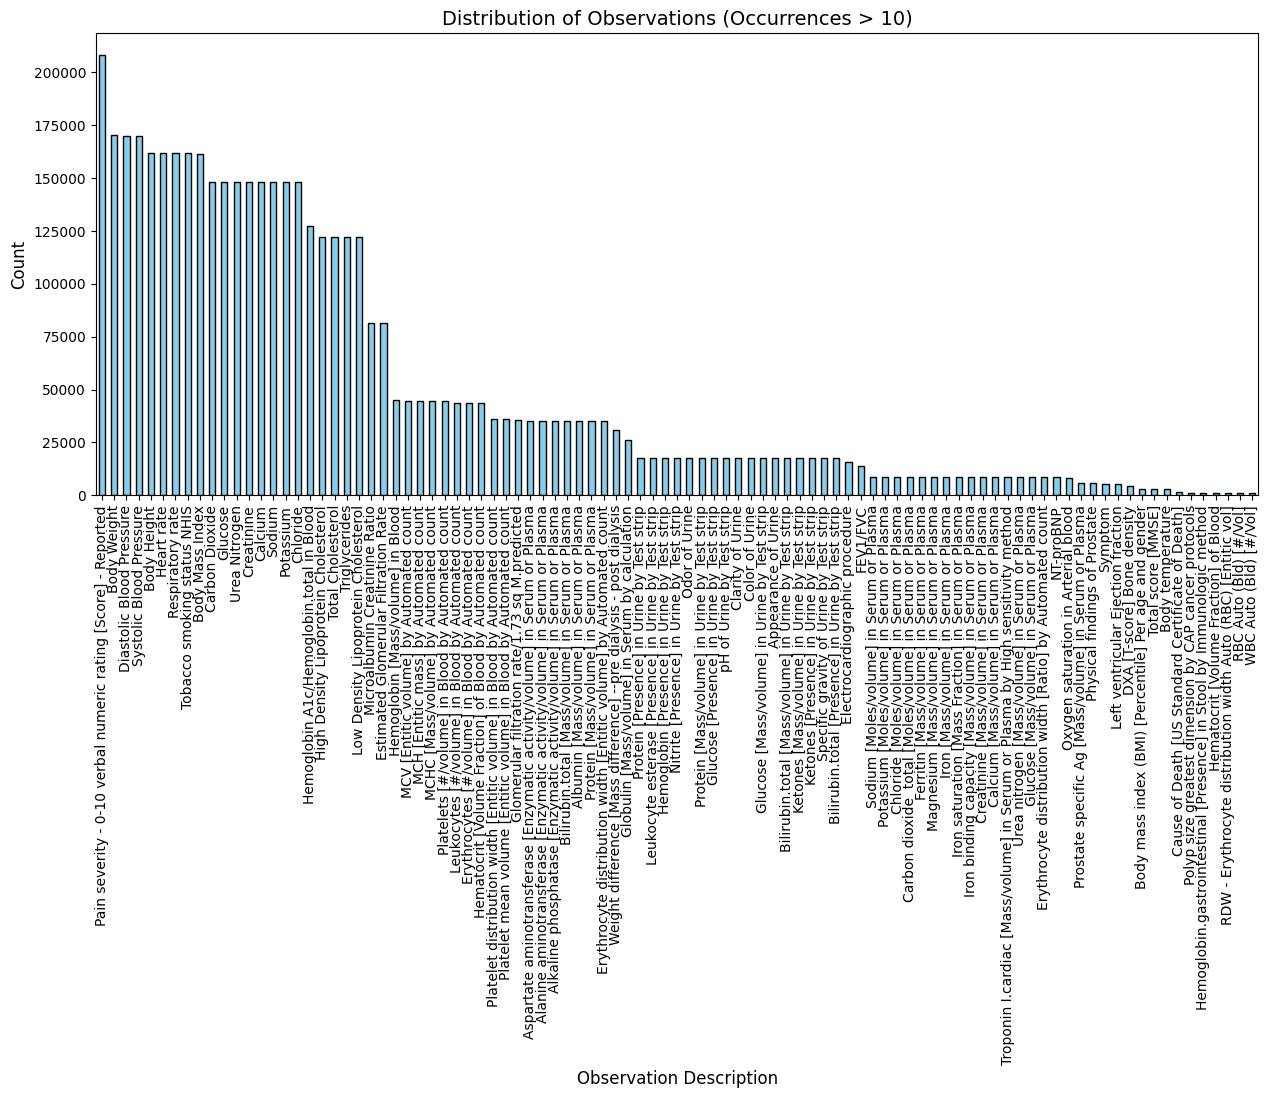

In [69]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value
value_counts = final_df["observations_DESCRIPTION"].value_counts()

# Filter values that appear more than 10 times
filtered_counts = value_counts[value_counts > 1000]

# Plot bar chart (better than histogram for categorical data)
plt.figure(figsize=(15, 6))
filtered_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Observation Description", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Observations (Occurrences > 10)", fontsize=14)
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()


In [70]:
final_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_ENCOUNTERCLASS,...,devices_DESCRIPTION,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,urgentcare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,inpatient,...,NaN,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,ambulatory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,21000-5,Erythrocyte distribution width [Entitic volume...,41.1,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,777-3,Platelets [#/volume] in Blood by Automated count,199.0,10*3/uL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32207-3,Platelet distribution width [Entitic volume] i...,162.0,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32623-1,Platelet mean volume [Entitic volume] in Blood...,11.5,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb


In [71]:
final_df["encounters_REASONCODE"].nunique()

98

In [72]:
neww_df = final_df

In [73]:
print(neww_df.columns.tolist())


['ENCOUNTER', 'medications_CODE', 'medications_DESCRIPTION', 'medications_REASONCODE', 'medications_REASONDESCRIPTION', 'immunizations_CODE', 'immunizations_DESCRIPTION', 'encounters_START', 'encounters_STOP', 'encounters_ENCOUNTERCLASS', 'encounters_CODE', 'encounters_DESCRIPTION', 'encounters_REASONCODE', 'encounters_REASONDESCRIPTION', 'careplans_ID', 'careplans_CODE', 'careplans_DESCRIPTION', 'careplans_REASONCODE', 'careplans_REASONDESCRIPTION', 'conditions_PATIENT', 'conditions_CODE', 'conditions_DESCRIPTION', 'devices_START', 'devices_PATIENT', 'devices_CODE', 'devices_DESCRIPTION', 'procedures_CODE', 'procedures_DESCRIPTION', 'procedures_REASONCODE', 'procedures_REASONDESCRIPTION', 'observations_CODE', 'observations_DESCRIPTION', 'observations_VALUE', 'observations_UNITS', 'PATIENT_ID']


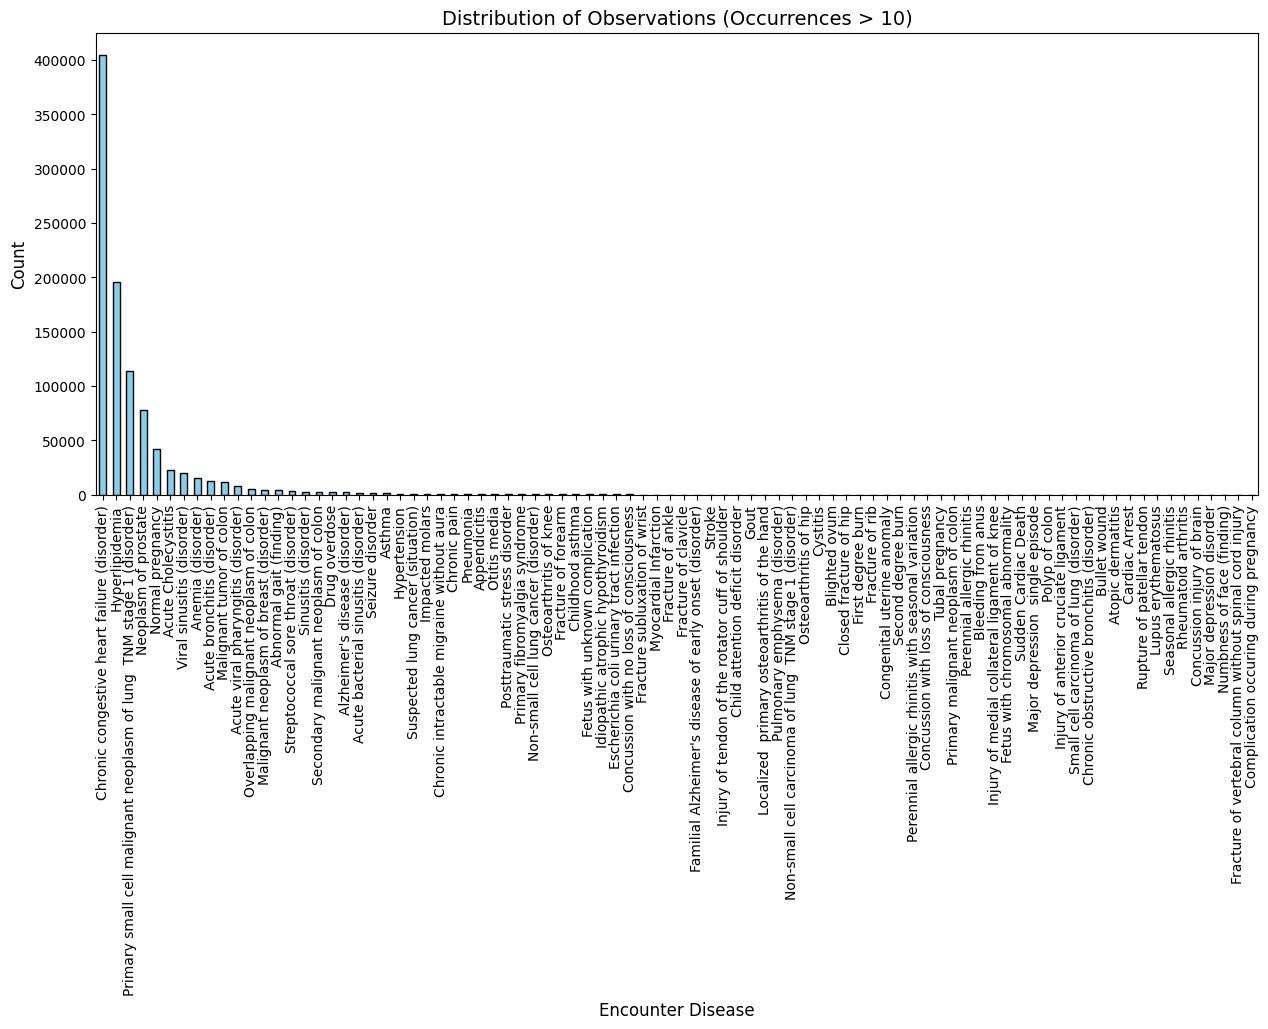

In [75]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value
value_counts = final_df["encounters_REASONDESCRIPTION"].value_counts()

# Filter values that appear more than 10 times
filtered_counts = value_counts[value_counts > 10]

# Plot bar chart (better than histogram for categorical data)
plt.figure(figsize=(15, 6))
filtered_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Encounter Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Observations (Occurrences > 10)", fontsize=14)
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()


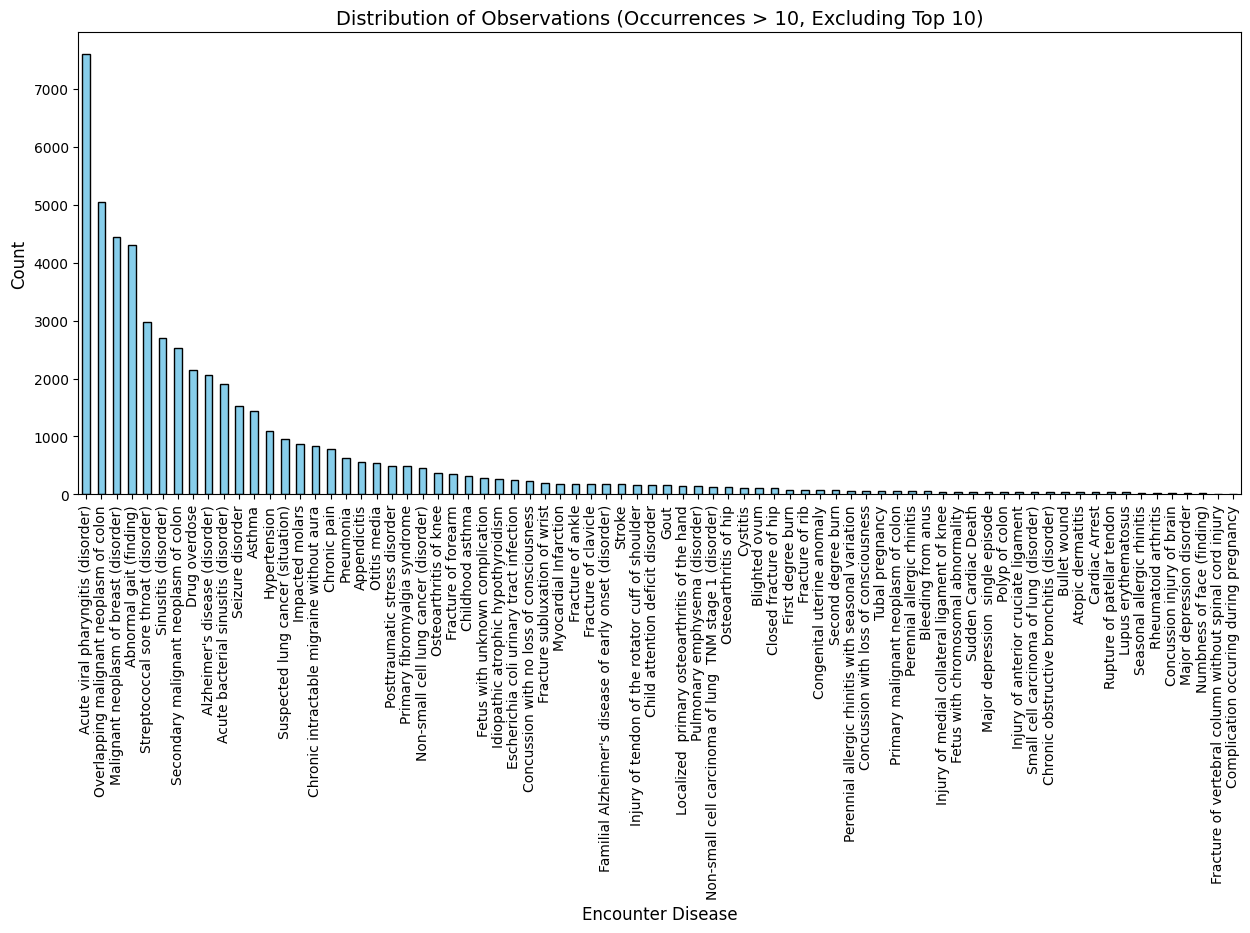

In [76]:
import matplotlib.pyplot as plt

# Count occurrences of each unique value
value_counts = final_df["encounters_REASONDESCRIPTION"].value_counts()

# Filter values that appear more than 10 times
filtered_counts = value_counts[value_counts > 10]

# Exclude the first 10 most common values
filtered_counts = filtered_counts.iloc[10:]

# Plot bar chart
plt.figure(figsize=(15, 6))
filtered_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Labels and title
plt.xlabel("Encounter Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Observations (Occurrences > 10, Excluding Top 10)", fontsize=14)
plt.xticks(rotation=90)  # Rotate labels for better readability

plt.show()


In [83]:
# Make an explicit copy to avoid SettingWithCopyWarning
neww_df = neww_df.copy()

# Now safely modify the 'encounters_REASONDESCRIPTION' column
top_11_values = neww_df["encounters_REASONDESCRIPTION"].value_counts().index[:11]

neww_df["encounters_REASONDESCRIPTION"] = neww_df["encounters_REASONDESCRIPTION"].apply(
    lambda x: x if (pd.isna(x) or x in top_11_values) else "Other"
)


In [84]:
neww_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,ENCOUNTER,medications_CODE,medications_DESCRIPTION,medications_REASONCODE,medications_REASONDESCRIPTION,immunizations_CODE,immunizations_DESCRIPTION,encounters_START,encounters_STOP,encounters_ENCOUNTERCLASS,...,devices_DESCRIPTION,procedures_CODE,procedures_DESCRIPTION,procedures_REASONCODE,procedures_REASONDESCRIPTION,observations_CODE,observations_DESCRIPTION,observations_VALUE,observations_UNITS,PATIENT_ID
0,000051d9-a8ca-f039-aaf7-60a76de5b279,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-20T04:19:28Z,2021-05-20T04:34:28Z,urgentcare,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50ed200c-bd80-c23a-0524-ca2cb8686f47
1,00008c10-322b-d915-e069-3d4abd8dc561,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-04T01:20:55Z,2020-11-05T01:20:55Z,inpatient,...,NaN,71651007.0,Mammography (procedure),254837009.0,Malignant neoplasm of breast (disorder),NaN,NaN,NaN,NaN,0f921224-5091-1f71-6074-f154c0b99cd0
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,314231.0,Simvastatin 10 MG Oral Tablet,55822004.0,Hyperlipidemia,NaN,NaN,1984-04-11T20:25:03Z,1984-04-11T20:40:03Z,ambulatory,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6c13136d-c52d-20a0-dd54-83b702e7f7fa
3,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,274804006.0,Evaluation of uterine fundal height,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
4,0000fbb0-3fc0-14fc-6be4-982db156e273,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-23T07:41:00Z,2013-01-23T07:56:00Z,ambulatory,...,NaN,225158009.0,Auscultation of the fetal heart,72892002.0,Normal pregnancy,NaN,NaN,NaN,NaN,799e7f01-e603-8a80-004b-c74e02df4f10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,21000-5,Erythrocyte distribution width [Entitic volume...,41.1,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,777-3,Platelets [#/volume] in Blood by Automated count,199.0,10*3/uL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32207-3,Platelet distribution width [Entitic volume] i...,162.0,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,NaN,NaN,NaN,NaN,NaN,NaN,2013-04-25T03:19:48Z,2013-04-25T03:34:48Z,ambulatory,...,NaN,703423002.0,Combined chemotherapy and radiation therapy (p...,363406005.0,Malignant tumor of colon,32623-1,Platelet mean volume [Entitic volume] in Blood...,11.5,fL,30fe95e3-951f-ef8c-4b1d-c921a9a6dbdb


In [85]:
cols_to_drop = [
    'medications_CODE', 'medications_DESCRIPTION', 'medications_REASONCODE', 'medications_REASONDESCRIPTION',
    'immunizations_CODE', 'immunizations_DESCRIPTION', 'encounters_START', 'encounters_STOP', 'encounters_ENCOUNTERCLASS', 'encounters_DESCRIPTION',
    'careplans_ID', 'careplans_CODE', 'careplans_DESCRIPTION', 'careplans_REASONCODE', 'careplans_REASONDESCRIPTION',
    'conditions_PATIENT', 'conditions_CODE', 'conditions_DESCRIPTION', 'devices_START', 'devices_PATIENT', 'devices_CODE', 'devices_DESCRIPTION',
    'procedures_CODE', 'procedures_DESCRIPTION', 'procedures_REASONCODE', 'procedures_REASONDESCRIPTION',
    'observations_DESCRIPTION', 'observations_UNITS', 'PATIENT_ID'
]

neww_df = neww_df.drop(columns=cols_to_drop, errors='ignore')


In [86]:
neww_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ENCOUNTER,encounters_CODE,encounters_REASONCODE,encounters_REASONDESCRIPTION,observations_CODE,observations_VALUE
0,000051d9-a8ca-f039-aaf7-60a76de5b279,702927004.0,NaN,NaN,NaN,NaN
1,00008c10-322b-d915-e069-3d4abd8dc561,410410006.0,254837009.0,Other,NaN,NaN
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,390906007.0,55822004.0,Hyperlipidemia,NaN,NaN
3,0000fbb0-3fc0-14fc-6be4-982db156e273,424619006.0,72892002.0,Normal pregnancy,NaN,NaN
4,0000fbb0-3fc0-14fc-6be4-982db156e273,424619006.0,72892002.0,Normal pregnancy,NaN,NaN
...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,21000-5,41.1
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,777-3,199.0
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32207-3,162.0
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32623-1,11.5


In [87]:
neww_df = neww_df[~neww_df["encounters_REASONDESCRIPTION"].isin(["Other", "Normal pregnancy"])]

In [88]:
neww_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ENCOUNTER,encounters_CODE,encounters_REASONCODE,encounters_REASONDESCRIPTION,observations_CODE,observations_VALUE
0,000051d9-a8ca-f039-aaf7-60a76de5b279,702927004.0,NaN,NaN,NaN,NaN
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,390906007.0,55822004.0,Hyperlipidemia,NaN,NaN
6,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,NaN,8302-2,160.5
7,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,NaN,72514-3,2.0
8,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,NaN,29463-7,50.4
...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,21000-5,41.1
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,777-3,199.0
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32207-3,162.0
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32623-1,11.5


In [90]:
neww_df["encounters_REASONDESCRIPTION"] =  neww_df["encounters_REASONDESCRIPTION"].fillna("Healthy")

<ipython-input-90-51f28e5295c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neww_df["encounters_REASONDESCRIPTION"] =  neww_df["encounters_REASONDESCRIPTION"].fillna("Healthy")


In [91]:
neww_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ENCOUNTER,encounters_CODE,encounters_REASONCODE,encounters_REASONDESCRIPTION,observations_CODE,observations_VALUE
0,000051d9-a8ca-f039-aaf7-60a76de5b279,702927004.0,NaN,Healthy,NaN,NaN
2,0000e73b-75ad-ff38-ebfe-9cf5af5b9d72,390906007.0,55822004.0,Hyperlipidemia,NaN,NaN
6,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,Healthy,8302-2,160.5
7,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,Healthy,72514-3,2.0
8,00011cca-7f8f-db57-6487-b317d95759f0,410620009.0,NaN,Healthy,29463-7,50.4
...,...,...,...,...,...,...
5128180,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,21000-5,41.1
5128181,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,777-3,199.0
5128182,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32207-3,162.0
5128183,ffff20dd-5089-b260-1c22-9d456ce11368,185347001.0,363406005.0,Malignant tumor of colon,32623-1,11.5


In [96]:
import pandas as pd

# Step 1: Identify top 15 most frequent observations_CODE
top_observations = (
    neww_df["observations_CODE"].value_counts().head(15).index.tolist()
)

# Step 2: Filter only those rows where observations_CODE is in top 15
filtered_df = neww_df[neww_df["observations_CODE"].isin(top_observations)]

# Step 3: Pivot table to get one row per encounter, columns as top 15 codes
pivot_df = filtered_df.pivot_table(
    index="ENCOUNTER",
    columns="observations_CODE",
    values="observations_VALUE",
    aggfunc="first"  # Use 'first' in case of multiple values per encounter-code pair
).reset_index()

# Step 4: Merge with encounters_REASONDESCRIPTION (keeping unique encounter entries)
encounter_info = final_df[["ENCOUNTER", "encounters_REASONDESCRIPTION"]].drop_duplicates()
final_pivot_df = pivot_df.merge(encounter_info, on="ENCOUNTER", how="left")

# Step 5: Display the transformed DataFrame
print(final_pivot_df.head())


                              ENCOUNTER 20565-8 2069-3 29463-7 2947-0 38483-4  \
0  00011cca-7f8f-db57-6487-b317d95759f0     NaN    NaN    50.4    NaN     NaN   
1  00015c6e-9674-c1db-20f8-5dca4e9789e9     NaN    NaN     NaN    NaN     NaN   
2  00027ab3-7387-82e6-3023-b5b9ec9634a8    24.6  105.5    90.7  140.4     0.9   
3  0003c671-c234-242a-cb82-f7648e9f94d6    22.8  104.4    49.7  143.3     1.8   
4  0003e35d-9a9e-2535-a513-4ca06466d69c    27.4  103.3     NaN  143.3     2.8   

  39156-5 49765-1 6298-4       72166-2 72514-3 8302-2 8462-4 8480-6 8867-4  \
0    19.6     NaN    NaN  Never smoker     2.0  160.5   55.0  100.0   85.0   
1     NaN     NaN    NaN           NaN     6.0    NaN    NaN    NaN    NaN   
2    29.6     9.5    4.6  Never smoker     2.0  175.2   85.0  158.0   83.0   
3    20.0     8.5    4.5  Never smoker     1.0  157.6   77.0  150.0  100.0   
4     NaN     9.9    5.2           NaN     9.0    NaN    NaN    NaN    NaN   

  9279-1                       encounters_RE

In [97]:
final_pivot_df

,ENCOUNTER,20565-8,2069-3,29463-7,2947-0,38483-4,39156-5,49765-1,6298-4,72166-2,72514-3,8302-2,8462-4,8480-6,8867-4,9279-1,encounters_REASONDESCRIPTION
0,00011cca-7f8f-db57-6487-b317d95759f0,NaN,NaN,50.4,NaN,NaN,19.6,NaN,NaN,Never smoker,2.0,160.5,55.0,100.0,85.0,15.0,Healthy
1,00015c6e-9674-c1db-20f8-5dca4e9789e9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,Healthy
2,00027ab3-7387-82e6-3023-b5b9ec9634a8,24.6,105.5,90.7,140.4,0.9,29.6,9.5,4.6,Never smoker,2.0,175.2,85.0,158.0,83.0,16.0,Healthy
3,0003c671-c234-242a-cb82-f7648e9f94d6,22.8,104.4,49.7,143.3,1.8,20.0,8.5,4.5,Never smoker,1.0,157.6,77.0,150.0,100.0,15.0,Healthy
4,0003e35d-9a9e-2535-a513-4ca06466d69c,27.4,103.3,NaN,143.3,2.8,NaN,9.9,5.2,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Primary small cell malignant neoplasm of lung ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90787,fffabf07-29a6-1afd-0d1e-7ef1bc7f6465,NaN,NaN,97.9,NaN,NaN,28.4,NaN,NaN,Former smoker,3.0,185.6,77.0,124.0,70.0,13.0,Healthy
90788,fffb579a-0a1c-d748-723b-7e41a9a3913c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,133.0,NaN,NaN,Chronic congestive heart failure (disorder)
90789,fffc82d6-1fa3-b447-ab9f-94d20bfe4bfb,25.1,102.9,106.3,137.6,1.4,30.5,8.9,4.6,Never smoker,2.0,186.8,64.0,123.0,83.0,14.0,Healthy
90790,fffdbc48-da73-9ebc-b9bb-3c506e7e2377,NaN,NaN,75.0,NaN,NaN,30.1,NaN,NaN,Former smoker,3.0,157.9,83.0,157.0,79.0,12.0,Healthy


In [98]:
# Count NaN values in each column
null_counts = final_pivot_df.isnull().sum()

# Display the result
print(null_counts)


ENCOUNTER                           0
20565-8                         48145
2069-3                          48145
29463-7                         43161
2947-0                          48145
38483-4                         48145
39156-5                         45148
49765-1                         48145
6298-4                          48145
72166-2                         44816
72514-3                         20396
8302-2                          44816
8462-4                          37015
8480-6                          37015
8867-4                          44816
9279-1                          44816
encounters_REASONDESCRIPTION        0
dtype: int64


In [99]:
# List of top 15 columns
top_15_columns = [
    "20565-8", "2069-3", "29463-7", "2947-0", "38483-4", 
    "39156-5", "49765-1", "6298-4", "72166-2", "72514-3", 
    "8302-2", "8462-4", "8480-6", "8867-4", "9279-1"
]

# Count missing values per row for only the top 15 columns
missing_counts = final_pivot_df[top_15_columns].isna().sum(axis=1)

# Filter to keep only rows where fewer than 13 of the 15 columns are missing
filtered_pivot_df = final_pivot_df[missing_counts < 13]

# Display the cleaned DataFrame
print(filtered_pivot_df.shape)
print(filtered_pivot_df.head())


(59384, 17)
                              ENCOUNTER 20565-8 2069-3 29463-7 2947-0 38483-4  \
0  00011cca-7f8f-db57-6487-b317d95759f0     NaN    NaN    50.4    NaN     NaN   
2  00027ab3-7387-82e6-3023-b5b9ec9634a8    24.6  105.5    90.7  140.4     0.9   
3  0003c671-c234-242a-cb82-f7648e9f94d6    22.8  104.4    49.7  143.3     1.8   
4  0003e35d-9a9e-2535-a513-4ca06466d69c    27.4  103.3     NaN  143.3     2.8   
6  0004d3ce-f05d-719f-d3ff-7c8304a7fc45     NaN    NaN    79.6    NaN     NaN   

  39156-5 49765-1 6298-4       72166-2 72514-3 8302-2 8462-4 8480-6 8867-4  \
0    19.6     NaN    NaN  Never smoker     2.0  160.5   55.0  100.0   85.0   
2    29.6     9.5    4.6  Never smoker     2.0  175.2   85.0  158.0   83.0   
3    20.0     8.5    4.5  Never smoker     1.0  157.6   77.0  150.0  100.0   
4     NaN     9.9    5.2           NaN     9.0    NaN    NaN    NaN    NaN   
6    30.2     NaN    NaN  Never smoker     1.0  162.4   85.0  157.0   66.0   

  9279-1                       e

In [100]:
filtered_pivot_df

,ENCOUNTER,20565-8,2069-3,29463-7,2947-0,38483-4,39156-5,49765-1,6298-4,72166-2,72514-3,8302-2,8462-4,8480-6,8867-4,9279-1,encounters_REASONDESCRIPTION
0,00011cca-7f8f-db57-6487-b317d95759f0,NaN,NaN,50.4,NaN,NaN,19.6,NaN,NaN,Never smoker,2.0,160.5,55.0,100.0,85.0,15.0,Healthy
2,00027ab3-7387-82e6-3023-b5b9ec9634a8,24.6,105.5,90.7,140.4,0.9,29.6,9.5,4.6,Never smoker,2.0,175.2,85.0,158.0,83.0,16.0,Healthy
3,0003c671-c234-242a-cb82-f7648e9f94d6,22.8,104.4,49.7,143.3,1.8,20.0,8.5,4.5,Never smoker,1.0,157.6,77.0,150.0,100.0,15.0,Healthy
4,0003e35d-9a9e-2535-a513-4ca06466d69c,27.4,103.3,NaN,143.3,2.8,NaN,9.9,5.2,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Primary small cell malignant neoplasm of lung ...
6,0004d3ce-f05d-719f-d3ff-7c8304a7fc45,NaN,NaN,79.6,NaN,NaN,30.2,NaN,NaN,Never smoker,1.0,162.4,85.0,157.0,66.0,16.0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90786,fffabcff-8c78-90b1-29e5-7fe1ceb40aca,24.0,108.8,NaN,138.3,3.4,NaN,9.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyperlipidemia
90787,fffabf07-29a6-1afd-0d1e-7ef1bc7f6465,NaN,NaN,97.9,NaN,NaN,28.4,NaN,NaN,Former smoker,3.0,185.6,77.0,124.0,70.0,13.0,Healthy
90789,fffc82d6-1fa3-b447-ab9f-94d20bfe4bfb,25.1,102.9,106.3,137.6,1.4,30.5,8.9,4.6,Never smoker,2.0,186.8,64.0,123.0,83.0,14.0,Healthy
90790,fffdbc48-da73-9ebc-b9bb-3c506e7e2377,NaN,NaN,75.0,NaN,NaN,30.1,NaN,NaN,Former smoker,3.0,157.9,83.0,157.0,79.0,12.0,Healthy


In [109]:
pp_df = filtered_pivot_df.drop(columns=["ENCOUNTER"]) 

In [115]:
pp_df

,20565-8,2069-3,29463-7,2947-0,38483-4,39156-5,49765-1,6298-4,72166-2,72514-3,8302-2,8462-4,8480-6,8867-4,9279-1,encounters_REASONDESCRIPTION
0,NaN,NaN,50.4,NaN,NaN,19.6,NaN,NaN,Never smoker,2.0,160.5,55.0,100.0,85.0,15.0,Healthy
2,24.6,105.5,90.7,140.4,0.9,29.6,9.5,4.6,Never smoker,2.0,175.2,85.0,158.0,83.0,16.0,Healthy
3,22.8,104.4,49.7,143.3,1.8,20.0,8.5,4.5,Never smoker,1.0,157.6,77.0,150.0,100.0,15.0,Healthy
4,27.4,103.3,NaN,143.3,2.8,NaN,9.9,5.2,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Primary small cell malignant neoplasm of lung ...
6,NaN,NaN,79.6,NaN,NaN,30.2,NaN,NaN,Never smoker,1.0,162.4,85.0,157.0,66.0,16.0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90786,24.0,108.8,NaN,138.3,3.4,NaN,9.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyperlipidemia
90787,NaN,NaN,97.9,NaN,NaN,28.4,NaN,NaN,Former smoker,3.0,185.6,77.0,124.0,70.0,13.0,Healthy
90789,25.1,102.9,106.3,137.6,1.4,30.5,8.9,4.6,Never smoker,2.0,186.8,64.0,123.0,83.0,14.0,Healthy
90790,NaN,NaN,75.0,NaN,NaN,30.1,NaN,NaN,Former smoker,3.0,157.9,83.0,157.0,79.0,12.0,Healthy


In [117]:
mapping = {
    "Never smoker": -2,
    "Former smoker": 0,
    "Current every day smoker": 2
}

pp_df["72166-2"] = pp_df["72166-2"].map(mapping)

In [118]:
pp_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,20565-8,2069-3,29463-7,2947-0,38483-4,39156-5,49765-1,6298-4,72166-2,72514-3,8302-2,8462-4,8480-6,8867-4,9279-1,encounters_REASONDESCRIPTION
0,NaN,NaN,50.4,NaN,NaN,19.6,NaN,NaN,-2.0,2.0,160.5,55.0,100.0,85.0,15.0,Healthy
2,24.6,105.5,90.7,140.4,0.9,29.6,9.5,4.6,-2.0,2.0,175.2,85.0,158.0,83.0,16.0,Healthy
3,22.8,104.4,49.7,143.3,1.8,20.0,8.5,4.5,-2.0,1.0,157.6,77.0,150.0,100.0,15.0,Healthy
4,27.4,103.3,NaN,143.3,2.8,NaN,9.9,5.2,NaN,9.0,NaN,NaN,NaN,NaN,NaN,Primary small cell malignant neoplasm of lung ...
6,NaN,NaN,79.6,NaN,NaN,30.2,NaN,NaN,-2.0,1.0,162.4,85.0,157.0,66.0,16.0,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90786,24.0,108.8,NaN,138.3,3.4,NaN,9.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hyperlipidemia
90787,NaN,NaN,97.9,NaN,NaN,28.4,NaN,NaN,0.0,3.0,185.6,77.0,124.0,70.0,13.0,Healthy
90789,25.1,102.9,106.3,137.6,1.4,30.5,8.9,4.6,-2.0,2.0,186.8,64.0,123.0,83.0,14.0,Healthy
90790,NaN,NaN,75.0,NaN,NaN,30.1,NaN,NaN,0.0,3.0,157.9,83.0,157.0,79.0,12.0,Healthy


In [128]:
from sklearn.model_selection import train_test_split

X = pp_df.drop(columns=["encounters_REASONDESCRIPTION"])  
y = pp_df["encounters_REASONDESCRIPTION"]                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define X (features) and y (target)
X = pp_df.drop(columns=["encounters_REASONDESCRIPTION"])
y = pp_df["encounters_REASONDESCRIPTION"]

# Convert all columns to numeric where possible
X = X.apply(pd.to_numeric, errors="coerce")


# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Train XGBoost classifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9310


In [151]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import make_scorer, accuracy_score, f1_score
import numpy as np

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Initialize stratified K-fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring for non-healthy accuracy
def non_healthy_accuracy(y_true, y_pred):
    healthy_label = label_encoder.transform(["Healthy"])[0]
    mask = y_true != healthy_label
    return accuracy_score(y_true[mask], y_pred[mask])

# Metrics to track
scoring = {
    'accuracy': 'accuracy',
    'non_healthy_accuracy': make_scorer(non_healthy_accuracy),
    'macro_f1': 'f1_macro'
}

# Cross-validation with class weights
cv_results = cross_validate(
    XGBClassifier(random_state=42),
    X,
    y_encoded,
    cv=kf,
    scoring=scoring,
    fit_params={'sample_weight': compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)[y_encoded]},
    return_train_score=True
)

# Print results
print(f"Mean CV Accuracy: {np.mean(cv_results['test_accuracy']):.4f}")
print(f"Mean CV Non-Healthy Accuracy: {np.mean(cv_results['test_non_healthy_accuracy']):.4f}")
print(f"Mean CV Macro F1: {np.mean(cv_results['test_macro_f1']):.4f}")
print("\nFull breakdown:")
print(f"CV Accuracies: {cv_results['test_accuracy']}")
print(f"CV Non-Healthy Accuracies: {cv_results['test_non_healthy_accuracy']}")

Mean CV Accuracy: 0.8751
Mean CV Non-Healthy Accuracy: 0.8462
Mean CV Macro F1: 0.3789

Full breakdown:
CV Accuracies: [0.87143218 0.87749432 0.87614718 0.87261093 0.87782082]
CV Non-Healthy Accuracies: [0.84458175 0.83555133 0.84458175 0.8526616  0.85354256]


In [140]:
X

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,20565-8,2069-3,29463-7,2947-0,38483-4,39156-5,49765-1,6298-4,72166-2,72514-3,8302-2,8462-4,8480-6,8867-4,9279-1
0,NaN,NaN,50.4,NaN,NaN,19.6,NaN,NaN,-2.0,2.0,160.5,55.0,100.0,85.0,15.0
2,24.6,105.5,90.7,140.4,0.9,29.6,9.5,4.6,-2.0,2.0,175.2,85.0,158.0,83.0,16.0
3,22.8,104.4,49.7,143.3,1.8,20.0,8.5,4.5,-2.0,1.0,157.6,77.0,150.0,100.0,15.0
4,27.4,103.3,NaN,143.3,2.8,NaN,9.9,5.2,NaN,9.0,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,79.6,NaN,NaN,30.2,NaN,NaN,-2.0,1.0,162.4,85.0,157.0,66.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90786,24.0,108.8,NaN,138.3,3.4,NaN,9.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90787,NaN,NaN,97.9,NaN,NaN,28.4,NaN,NaN,0.0,3.0,185.6,77.0,124.0,70.0,13.0
90789,25.1,102.9,106.3,137.6,1.4,30.5,8.9,4.6,-2.0,2.0,186.8,64.0,123.0,83.0,14.0
90790,NaN,NaN,75.0,NaN,NaN,30.1,NaN,NaN,0.0,3.0,157.9,83.0,157.0,79.0,12.0


In [139]:
y

0                                                  Healthy
2                                                  Healthy
3                                                  Healthy
4        Primary small cell malignant neoplasm of lung ...
6                                                  Healthy
                               ...                        
90786                                       Hyperlipidemia
90787                                              Healthy
90789                                              Healthy
90790                                              Healthy
90791                             Malignant tumor of colon
Name: encounters_REASONDESCRIPTION, Length: 59384, dtype: object

In [132]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        34
           1       0.00      0.00      0.00         2
           2       1.00      0.98      0.99       297
           3       0.97      0.95      0.96      9773
           4       0.75      0.95      0.84      1480
           5       0.79      0.30      0.43        64
           6       0.00      0.00      0.00        56
           7       0.25      0.05      0.08        85
           8       0.00      0.00      0.00        86

    accuracy                           0.93     11877
   macro avg       0.42      0.36      0.37     11877
weighted avg       0.92      0.93      0.92     11877



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [137]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np
# Define 5-fold stratified cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Train XGBoost with cross-validation
model = XGBClassifier(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y_encoded, cv=kf, scoring="accuracy")

# Print results
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard deviation: {np.std(cv_scores):.4f}")

Cross-validation accuracy scores: [0.93011703 0.93003284 0.93306391 0.92902248 0.9313742 ]
Mean accuracy: 0.9307
Standard deviation: 0.0014


In [141]:
from sklearn.metrics import accuracy_score

# Find the encoded value for "Healthy"
healthy_label = label_encoder.transform(["Healthy"])[0]

# Predict "Healthy" for all test samples
y_pred_dumb = [healthy_label] * len(y_test)

# Evaluate model
dumb_accuracy = accuracy_score(y_test, y_pred_dumb)
print(f"Dumb Model Accuracy (Always Healthy): {dumb_accuracy:.4f}")


Dumb Model Accuracy (Always Healthy): 0.8229


In [143]:
import numpy as np

# Get the encoded label for "Healthy"
healthy_label = label_encoder.transform(["Healthy"])[0]

# Find test cases where the true label is NOT "Healthy"
non_healthy_indices = np.where(y_test != healthy_label)[0]  # Indices where true label ≠ "Healthy"

# Get true labels for these cases
y_test_non_healthy = y_test[non_healthy_indices]

# Get dumb model's predictions (always "Healthy")
y_pred_dumb_non_healthy = np.full_like(y_test_non_healthy, healthy_label)

# Count total non-healthy cases
total_non_healthy = len(y_test_non_healthy)

# Count correct predictions (should be 0 ideally)
correct_non_healthy = np.sum(y_pred_dumb_non_healthy == y_test_non_healthy)

# Compute accuracy on non-healthy cases
accuracy_non_healthy = correct_non_healthy / total_non_healthy if total_non_healthy > 0 else 0

# Print results
print(f"Total non-healthy cases: {total_non_healthy}")
print(f"Dumb model correct predictions when true label is NOT 'Healthy': {correct_non_healthy}")
print(f"Accuracy on non-healthy cases: {accuracy_non_healthy:.4f} ({accuracy_non_healthy * 100:.2f}%)")


Total non-healthy cases: 2104
Dumb model correct predictions when true label is NOT 'Healthy': 0
Accuracy on non-healthy cases: 0.0000 (0.00%)


In [147]:
from sklearn.utils.class_weight import compute_class_weight

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data (stratify to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# Compute balanced class weights (inversely proportional to class frequency)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Assign weights to each training sample
sample_weights = class_weights[y_train]

# Train XGBoost with sample weights
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=sample_weights)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8732


In [148]:
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights ONCE using full training data
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary for reference (optional)
weight_dict = {cls: weight for cls, weight in enumerate(class_weights)}
print("Class weights:", weight_dict)

# Initialize stratified k-fold (preserves class distribution)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store accuracy scores
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train)):
    print(f"\nFold {fold+1}")
    
    # Split data
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train[train_idx], y_train[val_idx]
    
    # Apply class weights to training samples
    sample_weights = class_weights[y_fold_train]
    
    # Train model
    model = XGBClassifier(random_state=42)
    model.fit(X_fold_train, y_fold_train, sample_weight=sample_weights)
    
    # Evaluate
    y_pred = model.predict(X_fold_val)
    acc = accuracy_score(y_fold_val, y_pred)
    fold_accuracies.append(acc)
    
    print(f"Validation Accuracy: {acc:.4f}")

# Final evaluation
print("\nCross-Validation Results:")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f}")
print(f"Std Accuracy: {np.std(fold_accuracies):.4f}")

# Optional: Retrain on full training data with weights
final_sample_weights = class_weights[y_train]
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train, sample_weight=final_sample_weights)

# Test set evaluation
y_test_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")

Class weights: {0: 39.392205638474294, 1: 879.7592592592592, 2: 4.446971824393897, 3: 0.13502904828495743, 4: 0.8913467672332921, 5: 20.459517657192077, 6: 23.670652715495766, 7: 15.479635060280222, 8: 15.344638242894057}

Fold 1
Validation Accuracy: 0.8941

Fold 2
Validation Accuracy: 0.8873

Fold 3
Validation Accuracy: 0.8879

Fold 4
Validation Accuracy: 0.8892

Fold 5
Validation Accuracy: 0.8925

Cross-Validation Results:
Mean Accuracy: 0.8902
Std Accuracy: 0.0027

Final Test Accuracy: 0.8732


In [149]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get encoded label for "Healthy"
healthy_label = label_encoder.transform(["Healthy"])[0]

# Test set predictions (from final model)
y_test_pred = model.predict(X_test)

# Create mask for non-healthy cases in TRUE labels
non_healthy_mask = y_test != healthy_label

# Filter predictions and true labels for non-healthy cases
y_test_non_healthy = y_test[non_healthy_mask]
y_pred_non_healthy = y_test_pred[non_healthy_mask]

# Calculate metrics
correct_non_healthy = (y_pred_non_healthy == y_test_non_healthy).sum()
total_non_healthy = len(y_test_non_healthy)
accuracy_non_healthy = correct_non_healthy / total_non_healthy

print(f"Correct non-healthy predictions: {correct_non_healthy}/{total_non_healthy} ({accuracy_non_healthy:.2%})")

# Detailed class-wise report for non-healthy classes
non_healthy_classes = [cls for cls in label_encoder.classes_ if cls != "Healthy"]
print("\nClassification Report for Non-Healthy Classes:")
print(classification_report(
    y_test_non_healthy,
    y_pred_non_healthy,
    target_names=non_healthy_classes,
    zero_division=0
))

# Confusion matrix visualization
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Correct non-healthy predictions: 1764/2104 (83.84%)

Classification Report for Non-Healthy Classes:


ValueError: Number of classes, 9, does not match size of target_names, 8. Try specifying the labels parameter

In [150]:
# Get encoded label for "Healthy"
healthy_label = label_encoder.transform(["Healthy"])[0]

# Filter non-healthy cases
non_healthy_mask = y_test != healthy_label
y_test_non_healthy = y_test[non_healthy_mask]
y_pred_non_healthy = y_test_pred[non_healthy_mask]

# Get present classes and their names
present_non_healthy_labels = np.unique(y_test_non_healthy)
present_non_healthy_classes = label_encoder.inverse_transform(present_non_healthy_labels)

print(f"Present non-healthy classes: {list(present_non_healthy_classes)}")
print("\nClassification Report for Non-Healthy Classes:")
print(classification_report(
    y_test_non_healthy,
    y_pred_non_healthy,
    labels=present_non_healthy_labels,
    target_names=present_non_healthy_classes,
    zero_division=0
))

Present non-healthy classes: ['Acute bronchitis (disorder)', 'Anemia (disorder)', 'Chronic congestive heart failure (disorder)', 'Hyperlipidemia', 'Malignant tumor of colon', 'Neoplasm of prostate', 'Primary small cell malignant neoplasm of lung  TNM stage 1 (disorder)', 'Viral sinusitis (disorder)']

Classification Report for Non-Healthy Classes:
                                                                       precision    recall  f1-score   support

                                          Acute bronchitis (disorder)       0.00      0.00      0.00        34
                                                    Anemia (disorder)       0.00      0.00      0.00         2
                          Chronic congestive heart failure (disorder)       1.00      0.98      0.99       297
                                                       Hyperlipidemia       0.97      0.93      0.95      1480
                                             Malignant tumor of colon       0.61      0.62    

In [153]:
import pickle
import os

# Create a dictionary containing all relevant components
export_data = {
    'label_encoder': label_encoder,
    'class_weights': dict(zip(label_encoder.classes_, class_weights)),
    'model': model
}

# Define the file path
file_path = '/kaggle/working/model_with_weights.pkl'

# Save to pickle file
with open(file_path, 'wb') as f:
    pickle.dump(export_data, f)

# Verify file creation
if os.path.exists(file_path):
    print(f"Successfully exported model and weights to {file_path}")
else:
    print("Failed to save the file. Please check the directory permissions.")

Successfully exported model and weights to /kaggle/working/model_with_weights.pkl
